In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

In [3]:
sc.settings.verbosity = 3

In [4]:
import os
os.chdir('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/')

In [5]:
adata_path='/hpcnfs/scratch/DIMA/piva/mpi_freiburg/adata/adata_annotation.h5ad'
adata=sc.read_h5ad(adata_path)

In [6]:
adata

AnnData object with n_obs × n_vars = 22358 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublets', 'dataset', 'sample', 'stage', 'replicate', 'nCount_ATAC', 'nFeature_ATAC', 'integrated_snn_res.0.8', 'ident', 'leiden_res15', 'leiden_res12', 'leiden_res1', 'annotation_leiden12', 'group'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol'
    uns: 'X_name', 'annotation2_colors', 'annotation_leiden12_3_colors', 'annotation_leiden12_colors', 'dataset_colors', 'dendrogram_annotation2', 'dendrogram_annotation_leiden12', 'dendrogram_annotation_leiden12_3', 'dendrogram_leiden_res12', 'dendrogram_seurat_clusters', 'hvg', 'ident_colors', 'leiden', 'leiden_res12_colors', 'leiden_res15_colors', 'neighbors', 'sample_colors', 'seurat_clusters_colors', 'umap'
    obsm: 'PCA', 'UMAP', 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

# visualization

In [8]:
colori_samples={'wt':"#00BA38" , "ez":"#619CFF", "nej":"#F8766D"}

colori_germs= {"anterioposterior_ectoderm": '#002554',
                "mesoderm":'#FA4616',
                "dorsal_ectoderm" :'#5E8AB4',
                "ventral_ectoderm": '#B1C9E8',
                "anterior_endoderm":'#6CC24A',
                "posterior_endoderm": '#007041',
                "yolk" : '#EFDF00',
                "undifferentiated_cells" : '#68478D',
                "pluripotent_progenitors" :'#686E9F',
                "neuroectoderm":"#05C3DE"}

In [9]:
colori_germs= {"anterioposterior_ectoderm": '#002554',
                "mesoderm":'#FA4616',
                "dorsal_ectoderm" :'#5E8AB4',
                "ventral_ectoderm": '#ab93c6',
                "anterior_endoderm":'#6CC24A',
                "posterior_endoderm": '#007041',
                "yolk" : '#efd129',
                "undifferentiated_cells" : '#b22987',
                "pluripotent_progenitors" :'#ff9900',
                "neuroectoderm":"#05C3DE"}

In [11]:
pwd

'/hpcnfs/scratch/DIMA/piva/mpi_freiburg'

In [12]:
adata.var['FB_id']=adata.var.index
adata.var.set_index('symbol',inplace=True)

In [13]:
adata.obs['annotation_leiden12'].unique()

order_germ=[ 'mesoderm','anterioposterior_ectoderm', 'dorsal_ectoderm','neuroectoderm', 'ventral_ectoderm',  'anterior_endoderm', 'posterior_endoderm','yolk',
 'undifferentiated_cells',  'pluripotent_progenitors']
order_germ_wt=[ 'mesoderm','anterioposterior_ectoderm', 'dorsal_ectoderm','neuroectoderm', 'ventral_ectoderm',  'anterior_endoderm', 'posterior_endoderm','yolk', 'undifferentiated_cells']

# Pathway

In [24]:
pathways=pd.read_excel('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/Signaling_pathways.xlsx')
pathways

Hedgehog Signaling Wingless Signaling Notch Signaling TGF-B signaling  \
0                 ptc                 wg               N             dpp   
1                 smo                arm              D1            Actβ   
2                  ci                dsh             mam             tkv   
3                  hh                 fz           Su(H)             sax   
4                  fu                pan          E(spl)             Mad   
5               dally               pygo    E(spl)m8-HLH             Med   
6                  en                nkd            neur             Dad   
7                Ubc7                dgo             Ser             put   
8                col2                Axn            neur             wit   
9                disp               gish             NaN             shn   
10                NaN                NaN             NaN             NaN   
11                NaN                NaN             NaN             NaN   
12                NaN                NaN             NaN             NaN   
13                NaN                NaN             NaN             NaN   

   JAK-STAT pathway EGFR signaling Hippo signaling IIS Signaling  
0              upd1             vn             hpo          Ilp1  
1              dome            spi             wts          Ilp2  
2           Stat92E           Egfr             yki          Ilp3  
3               hop            ras              ex          Ilp4  
4           Socs36E            Raf             Mer          Ilp5  
5           Socs16D           p38a             sav          Ilp6  
6              upd3             rl            mats           InR  
7            Src64B            pnt              fj           Akt  
8               ras             rl              ft          foxo  
9              upd2            ksr              ds       Pi3K92E  
10              NaN            NaN             NaN          mTor  
11              NaN            NaN             NaN          Rheb  
12              NaN            NaN             NaN           S6k  
13              NaN            NaN             NaN          Thor

In [25]:
for score_name in pathways.columns.tolist():
    gene_list=pathways[score_name].dropna().tolist()
    sc.tl.score_genes(adataRNA, gene_list=gene_list,score_name='%s_signature'%(score_name)  )

computing score 'Hedgehog Signaling_signature'
    finished: added
    'Hedgehog Signaling_signature', score of gene set (adata.obs).
    349 total control genes are used. (0:00:00)
computing score 'Wingless Signaling_signature'
    finished: added
    'Wingless Signaling_signature', score of gene set (adata.obs).
    250 total control genes are used. (0:00:00)
computing score 'Notch Signaling_signature'
    finished: added
    'Notch Signaling_signature', score of gene set (adata.obs).
    200 total control genes are used. (0:00:00)
computing score 'TGF-B signaling_signature'
    finished: added
    'TGF-B signaling_signature', score of gene set (adata.obs).
    350 total control genes are used. (0:00:00)
computing score 'JAK-STAT pathway_signature'
    finished: added
    'JAK-STAT pathway_signature', score of gene set (adata.obs).
    299 total control genes are used. (0:00:00)
computing score 'EGFR signaling_signature'
    finished: added
    'EGFR signaling_signature', score of ge

In [32]:
sigs=['Hedgehog Signaling_signature', 'Wingless Signaling_signature',
       'Notch Signaling_signature', 'TGF-B signaling_signature',
       'JAK-STAT pathway_signature', 'EGFR signaling_signature',
       'Hippo signaling_signature', 'IIS Signaling_signature']

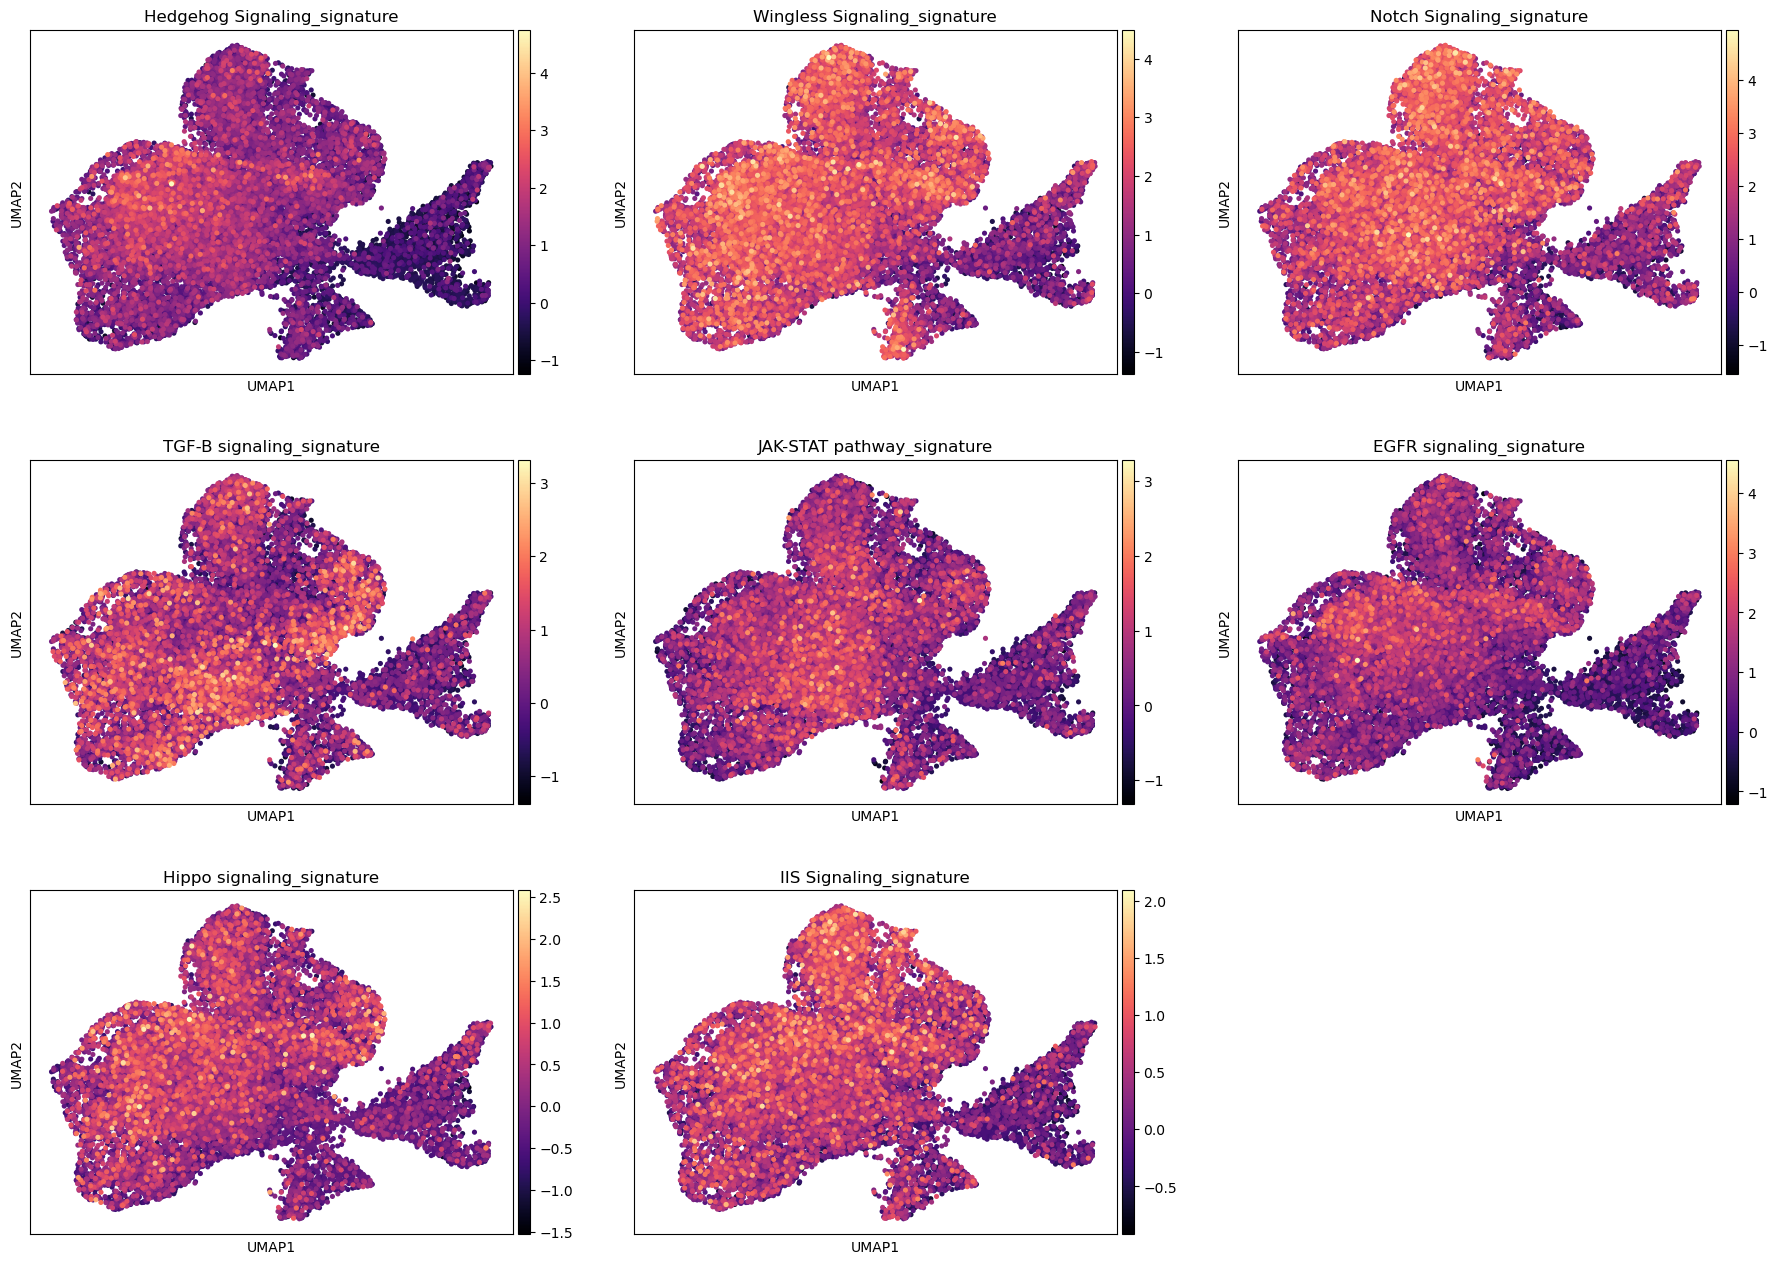

In [36]:
sc.pl.umap(adataRNA, color=sigs, size=55,ncols=3, cmap='magma',
         #  save='_signaling_pathways.pdf'
          )


In [38]:
import warnings
warnings.filterwarnings('ignore')

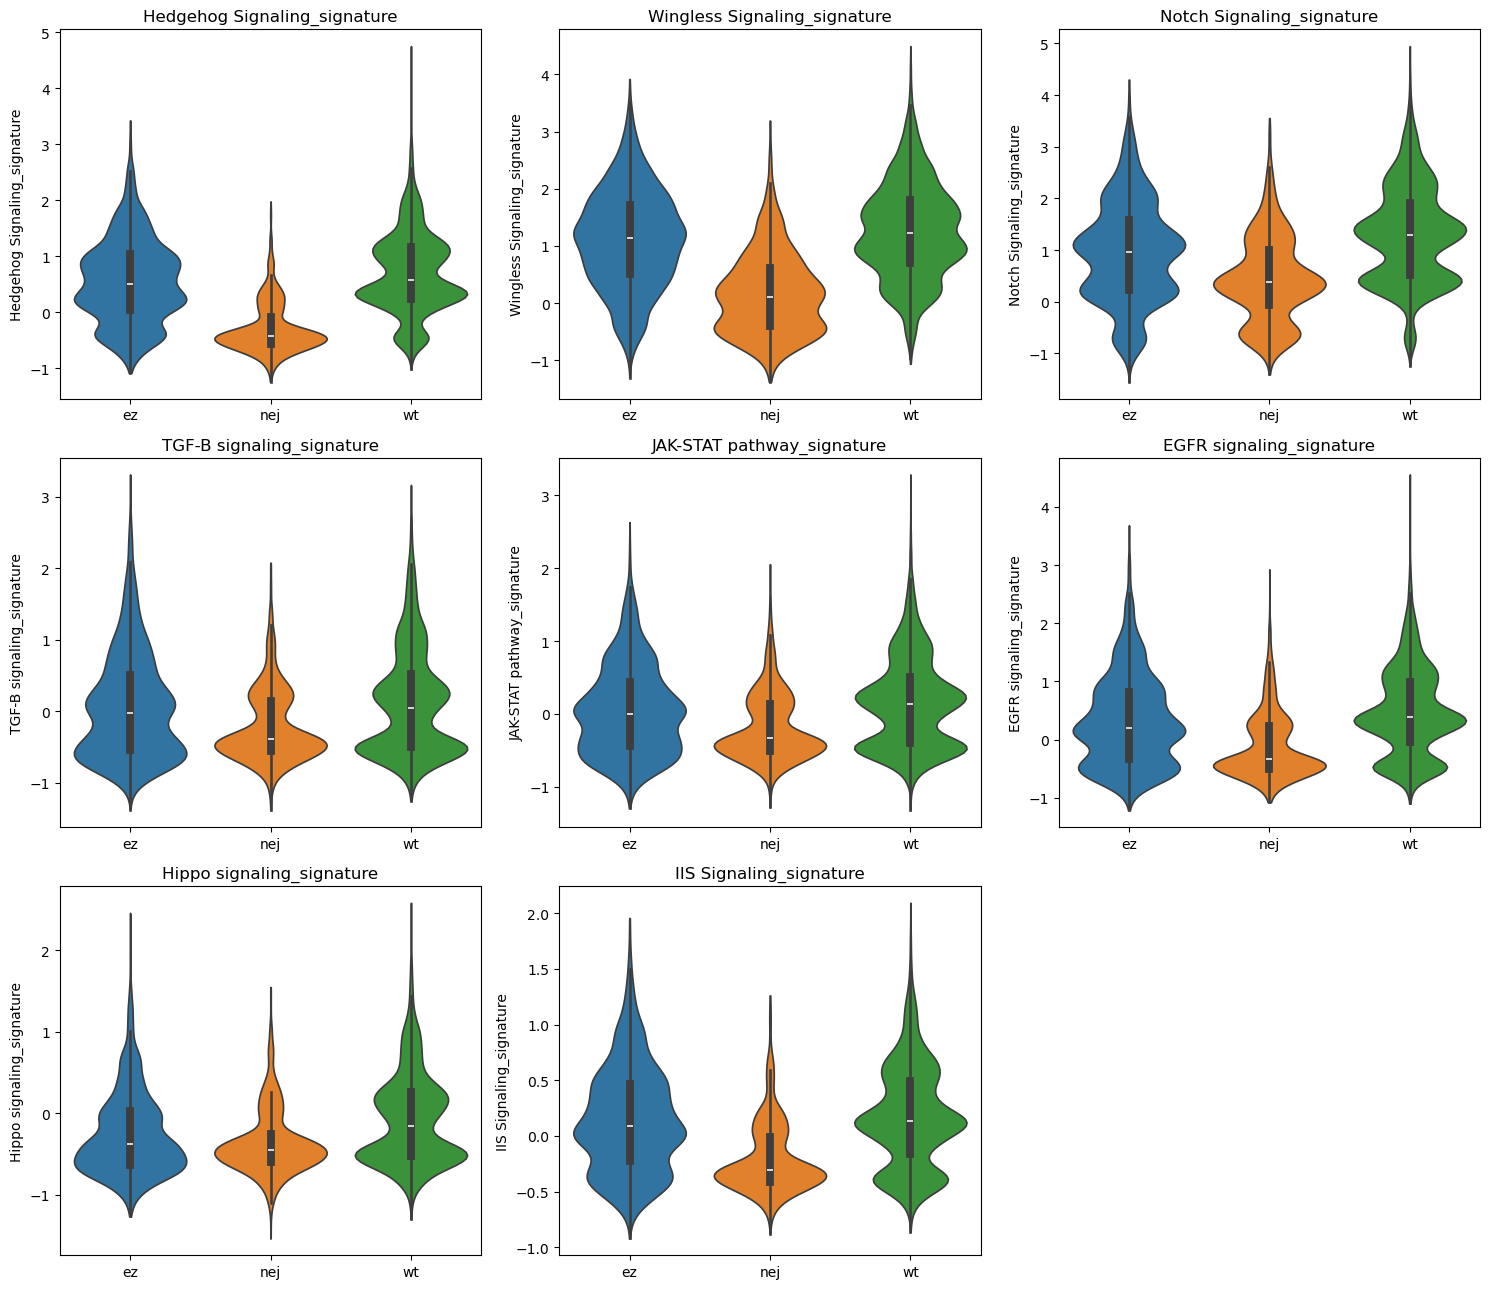

In [39]:
fig, ax= plt.subplots(3,3, figsize=(15,13))
axs=ax.ravel()
for i,s in enumerate(sigs):
    sc.pl.violin(adataRNA, keys=s, groupby='sample', stripplot=None, inner='box', 
                 show=False, ax=axs[i]
                )
    axs[i].set_title(s)
    axs[i].set_xlabel('')
axs[8].remove()
plt.tight_layout()
#plt.savefig('figures/violinplots_signaling_pathways.pdf')

In [67]:
import scipy
from scipy.stats import ttest_ind, mannwhitneyu, wilcoxon
from itertools import combinations

In [68]:
list(combinations(['wt','ez','nej'],2))

[('wt', 'ez'), ('wt', 'nej'), ('ez', 'nej')]

In [72]:
## test mannwhitneyu

pvalues={}
for si in sigs:
    pvalues[si]={}
    for g1,g2 in list(combinations(['wt','ez','nej'],2)):
        r,p=mannwhitneyu(
            adataRNA.obs[adataRNA.obs['sample']==g1][si],
            adataRNA.obs[adataRNA.obs['sample']==g2][si]
        )
        
        pvalues[si]['%s - %s'%(g1,g2)]=p
        
    

In [73]:
pd.DataFrame.from_dict(pvalues).transpose()

wt - ez       wt - nej       ez - nej
Hedgehog Signaling_signature   5.329853e-41   0.000000e+00   0.000000e+00
Wingless Signaling_signature   7.208443e-23   0.000000e+00   0.000000e+00
Notch Signaling_signature     1.104554e-123  4.698893e-303   2.456459e-95
TGF-B signaling_signature      1.905800e-08   1.749030e-71   3.806096e-40
JAK-STAT pathway_signature     2.075024e-26  9.897369e-114   7.622637e-49
EGFR signaling_signature       1.185963e-51  1.604879e-262  1.738680e-116
Hippo signaling_signature     2.966726e-114  2.265490e-104   7.948732e-10
IIS Signaling_signature        9.875853e-07  3.763718e-281  2.511143e-206

# Zld dep, H2av pos/neg pathways

In [38]:
genes_h2av=pd.read_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/cluster1_h2av-_genes.txt')['gene'].tolist()
genes_h2av_pos=pd.read_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/cluster1_h2av+_genes.txt')['gene'].tolist()
genes_zelda_dep=pd.read_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/Cluster1_zelda_dependent.txt')['gene'].tolist()


In [39]:
sc.tl.score_genes(adataRNA, gene_list=genes_h2av, score_name='h2av-_signature'  )
sc.tl.score_genes(adataRNA, gene_list=genes_h2av_pos, score_name='h2av+_signature'  )
sc.tl.score_genes(adataRNA, gene_list=genes_zelda_dep, score_name='zelda_dependent_signature')

computing score 'h2av-_signature'
    finished: added
    'h2av-_signature', score of gene set (adata.obs).
    345 total control genes are used. (0:00:00)
computing score 'h2av+_signature'
    finished: added
    'h2av+_signature', score of gene set (adata.obs).
    496 total control genes are used. (0:00:00)
computing score 'zelda_dependent_signature'
    finished: added
    'zelda_dependent_signature', score of gene set (adata.obs).
    546 total control genes are used. (0:00:00)


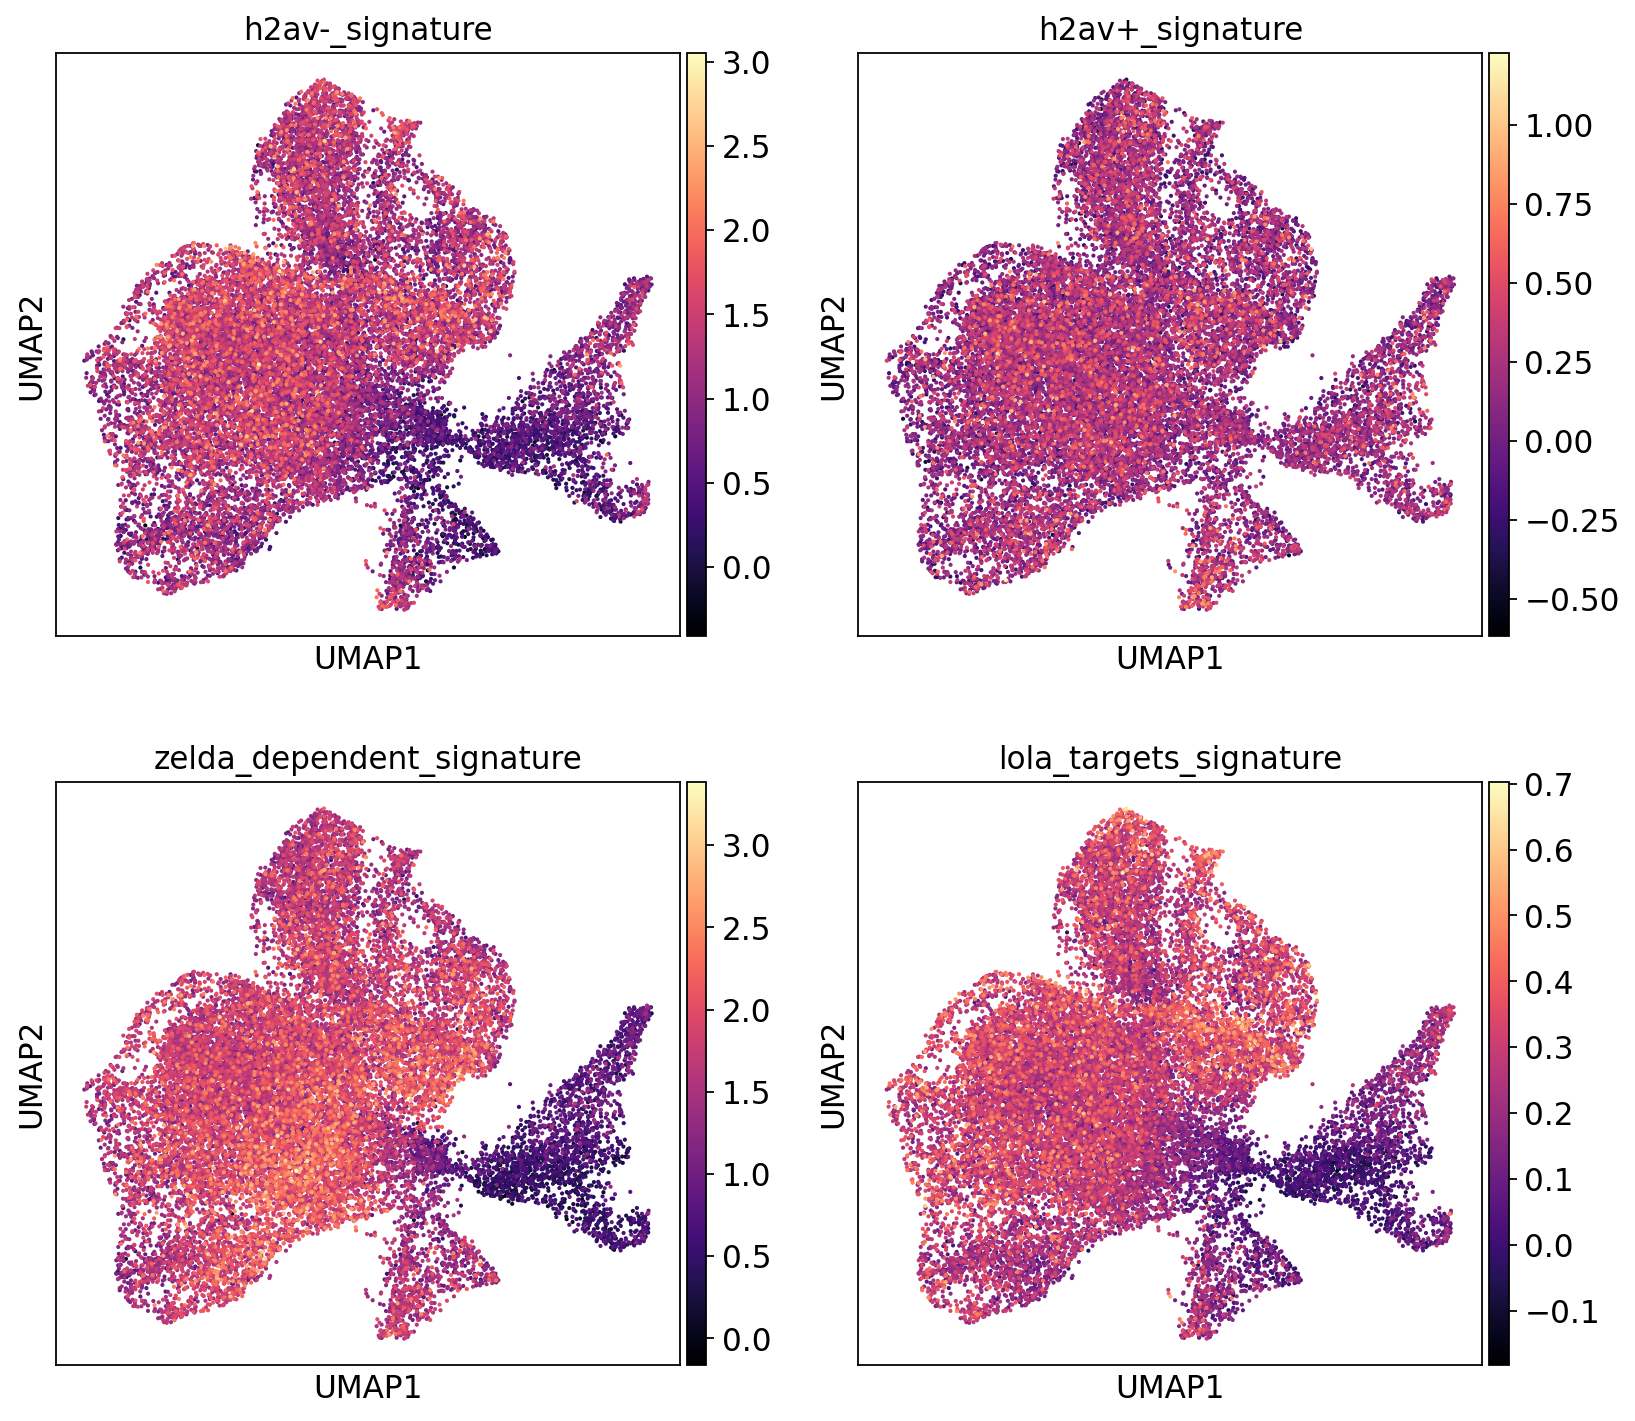

In [47]:
sc.set_figure_params(figsize=(5,5) )
sc.pl.umap(adataRNA, color=['h2av-_signature','h2av+_signature' , 'zelda_dependent_signature', 'lola_targets_signature'], ncols=2, cmap='magma', size=14, save='_umap_signatures.pdf'  )

In [41]:
pwd

'/hpcnfs/scratch/temporary/DIMA'

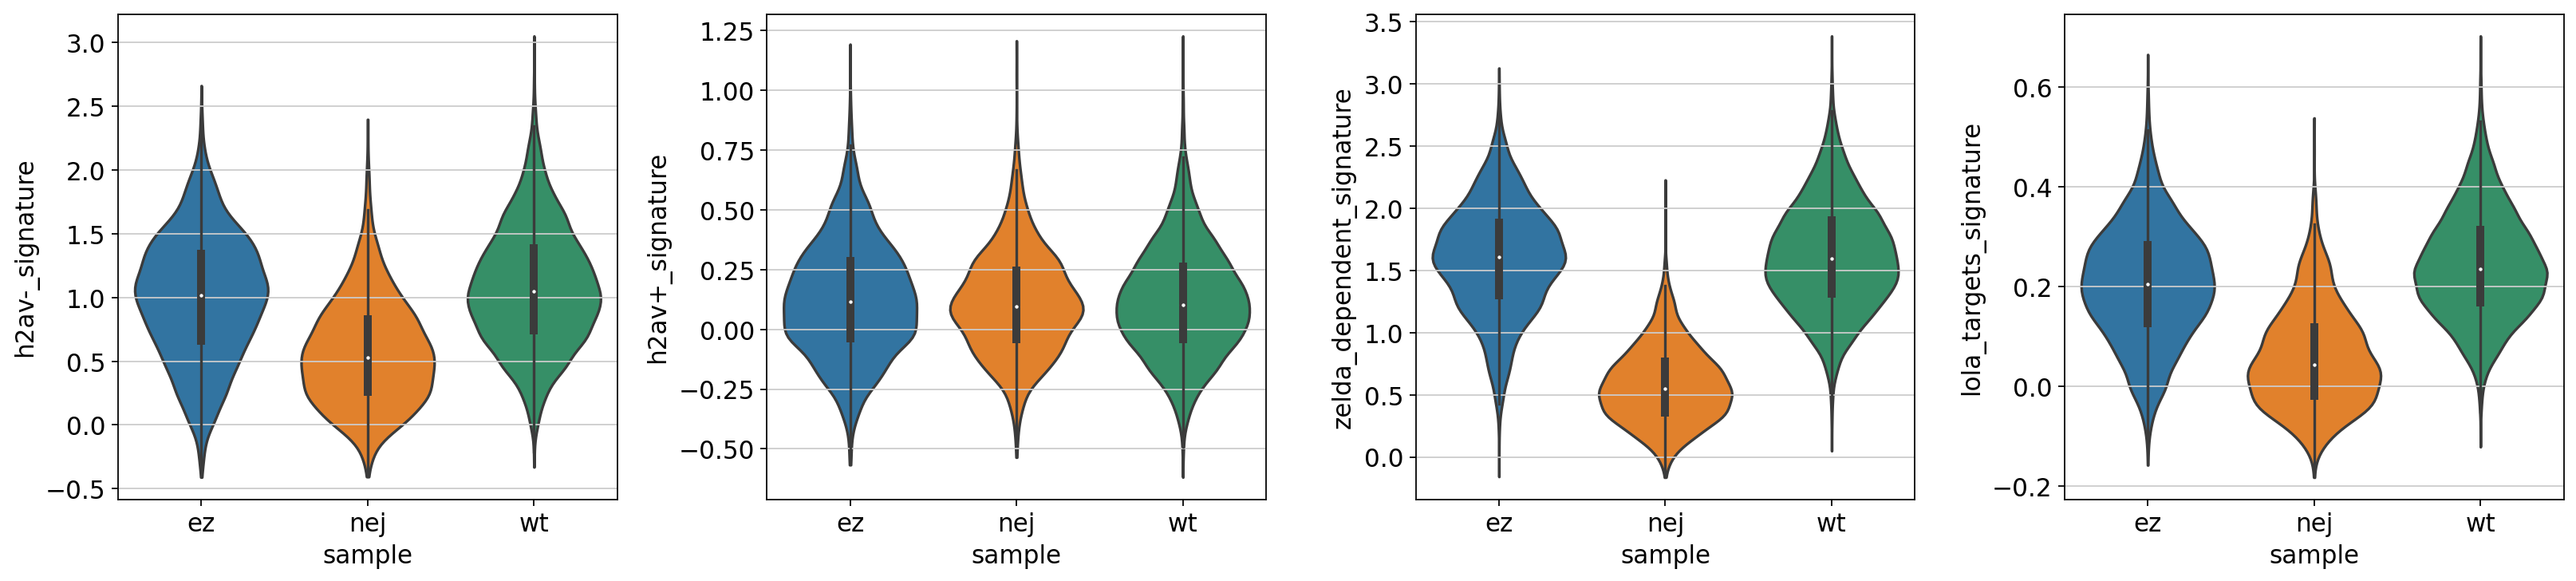

In [48]:
sc.set_figure_params(figsize=(5,5),  )
sc.pl.violin(adataRNA, keys=['h2av-_signature', 'h2av+_signature' ,'zelda_dependent_signature', 'lola_targets_signature'], groupby='sample', stripplot=None, inner='box', 
            save='_violin_signatures.pdf')